# Classification on Wine Dataset

## IMPORTANT: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluting your notebook!!!

### Dataset description

We will be working with a dataset on wines from the UCI machine learning repository
(http://archive.ics.uci.edu/ml/datasets/Wine). It contains data for 178 instances. 
The dataset is the results of a chemical analysis of wines grown in the same region
in Italy but derived from three different cultivars. The analysis determined the
quantities of 13 constituents found in each of the three types of wines. 

### The features in the dataset are:

- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
-Proline



We first import all the packages that are needed

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt


import numpy as np
import scipy as sp
from scipy import stats
from sklearn import datasets
from sklearn import linear_model

# Perceptron
We will implement the perceptron and use it to learn a halfspace with 0-1 loss.

**TO DO** Set the random seed to your ID (matricola).

In [2]:
IDnumber = 2013051
np.random.seed(IDnumber)

Load the dataset from scikit learn and then split in training set and test set (50%-50%) after applying a random permutation to the datset.

In [3]:
# Load the dataset from scikit learn
wine = datasets.load_wine()

# numbber of sampes in data
m = wine.data.shape[0]
# Random permutation 
permutation = np.random.permutation(m)

X = wine.data[permutation]
Y = wine.target[permutation]

We are going to classify class "1" vs the other two classes (0 and 2). We are going to relabel the other classes (0 and 2) as "-1" so that we can use it directly with the perceptron.

In [4]:
#let's relabel classes 0 and 2 as -1

for i in range(len(Y)):
    if Y[i] != 1:
        Y[i] = -1

**TO DO** Divide the data into training set and test set (50% of the data each)

In [5]:

#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.

#m_training needs to be the number of samples in the training set
m_training = m//2

#m_test needs to be the number of samples in the test set
m_test = m//2

#X_training = instances for training set
X_training = X[:m_training]
#Y_training = labels for the training set
Y_training = Y[:m_training]

#X_test = instances for test set
X_test = X[m_training:]
#Y_test = labels for the test set
Y_test = Y[m_training:]

print(Y_training) #to make sure that Y_training contains both 1 and -1

[ 1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1  1  1 -1 -1
  1 -1  1 -1  1  1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1  1 -1  1
  1  1 -1  1 -1 -1  1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1  1  1  1 -1]


In [6]:
# number of unique values
np.unique(Y_training, return_counts=True)

(array([-1,  1]), array([50, 39], dtype=int64))

**TO DO** Now add a 1 in front of each sample so that we can use a vector to describe all the coefficients of the model. You can use the function $hstack$ in $numpy$

In [7]:
#add a 1 to each sample

# Create arrays of ones with dimensions same as training data and test data
ones_training = np.ones((X_training.shape[0], 1))
ones_test = np.ones((X_test.shape[0], 1))
# Add one to each sample
X_training = np.hstack((ones_training, X_training))
X_test = np.hstack((ones_test, X_test))

**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where 1 iteration corresponds to 1 update of the perceptron weights. If the perceptron returns because the maximum number of iterations has been reached, you should return an appropriate model. 

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of missclassified samples for the best model

In [8]:
def perceptron(X, Y, max_num_iterations):

    #ADD CODE!
    m = X.shape[0]
    w = np.zeros(len(X[0]))
    eta = 1
    errors = []
    best_w = w
    best_error = np.inf
    for t in range(max_num_iterations):
        total_errors = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                total_errors += 1
                w = w + eta*X[i]*Y[i]
        total_errors = total_errors/m
        errors.append(total_errors)
        if(best_error > total_errors):
          best_error = total_errors
          best_w = w
        if total_errors == 0:
          break
    return best_w, best_error, errors

Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [9]:
#now run the perceptron for 100 iterations
w_found, training_error, errors = perceptron(X_training,Y_training, 100)
print("Training error with 100 iterations: "+str(training_error))

Training error with 100 iterations: 0.2696629213483146


**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of missclassified samples in the test set (that is an estimate of the true loss).

In [10]:
#now use the w_found to make predictions on test dataset
#num_errors = number of errors in the test set
y_pred = []
for i, x in enumerate(X_test):
  y_pred.append(np.where(np.dot(x, w_found) >= 0.0, 1, -1))

true_loss_estimate = np.sum(Y_test != y_pred)/m_test

#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Estimated true loss with 100 iterations:"+str(true_loss_estimate))

Estimated true loss with 100 iterations:0.3146067415730337


**TO DO**: what relation do you observe between the training error and the (estimated) true loss? Is this what you expected? Explain what you observe and why it does or does not conform to your expectations.

**ANSWER**: The (estimated) true loss is almost always greater than the training loss, the above results also shows that. The above models training error is also high which shows that the model is underfitting.

**TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 10000 iterations. 

In [11]:
#now run the perceptron for 10000 iterations here!

#ADD CODE!
w_found, training_error, errors = perceptron(X_training,Y_training, 100)
print("Training error with 100 iterations: "+str(training_error))
#training_error = error on the training set
w_found, training_error, errors = perceptron(X_training,Y_training, 10000)
print("Training error with 10000 iterations: "+str(training_error))

#num_errors = number of errors in the test set
y_pred = []
for i, x in enumerate(X_test):
  y_pred.append(np.where(np.dot(x, w_found) >= 0.0, 1, -1))

true_loss_estimate = np.sum(Y_test != y_pred)/m_test


#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Estimated true loss with 10000 iterations:"+str(true_loss_estimate))

Training error with 100 iterations: 0.2696629213483146
Training error with 10000 iterations: 0.0898876404494382
Estimated true loss with 10000 iterations:0.0898876404494382


**TO DO** [Answer the following] What changes in the training error and in the test error (in terms of fraction of missclassified samples)? Explain what you observe. [Write the answer in this cell]

**ANSWER** After training for a long period of time the training error decreased, the test error also decreased and is same as the training error which shows that the model is nor overfitting neither underfitting.

# Logistic Regression
Now we use logistic regression, as implemented in Scikit-learn, to predict labels. We first do it for 2 labels and then for 3 labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [12]:
# Load the dataset from scikit learn
wine = datasets.load_wine()

m = wine.data.shape[0]
permutation = np.random.permutation(m)

X = wine.data[permutation]
Y = wine.target[permutation]

**TO DO** As for the previous part, divide the data into training and test (50%-50%), relabel classes 0 and 2 as -1. Here there is no need to add a 1 at the beginning of each row, since it will be done automatically by the function we will use.

In [13]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.

m_training = int(m//2)
m_test = int(m//2)

X_training = X[:m_training]
Y_training = Y[:m_training]

X_test = X[m_training:]
Y_test = Y[m_training:]

#let's relabel classes 0 and 2 as -1

for i in range(len(Y)):
    if Y[i] != 1:
        Y[i] = -1

To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples missclassified in the training set and in the test set.

In [14]:
#part on logistic regression for 2 classes
logreg = linear_model.LogisticRegression(C=1e5, max_iter=5000, solver='liblinear')

#learn from training set

logreg.fit(X_training, Y_training)

#predict on training set

y_pred = logreg.predict(X_training)

#print the error rate = fraction of missclassified samples
misclassified = np.sum(y_pred != Y_training)
error_rate_training = misclassified/m_training
print("Error rate on training set: "+str(error_rate_training))

#predict on test set

y_pred = logreg.predict(X_test)

#print the error rate = fraction of missclassified samples
misclassified = np.sum(y_pred != Y_test)
error_rate_test = misclassified/m_test
print("Error rate on test set: "+str(error_rate_test))

Error rate on training set: 0.0
Error rate on test set: 0.07865168539325842


Now we do logistic regression for classification with 3 classes.

**TO DO** First: let's load the data once again (with the same permutation from before).

In [15]:
#part on logistic regression for 3 classes

#Divide in training and test: make sure that your training set
#contains at least 10 elements from each of the 3 classes!
#If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.
X = wine.data[permutation]
Y = wine.target[permutation]

m = X.shape[0]
m_training = int(m//2)
m_test = int(m//2)

X_training = X[:m_training]
Y_training = Y[:m_training]

X_test = X[m_training:]
Y_test = Y[m_training:]

In [16]:
np.unique(Y_training, return_counts=True)

(array([0, 1, 2]), array([26, 40, 23], dtype=int64))

**TO DO** Now perform logistic regression (instructions as before) for 3 classes, learning a model from the training set and predicting on the test set. Print the fraction of missclassified samples on the training set and the fraction of missclassified samples on the test set.

In [17]:
#part on logistic regression for 3 classes
logreg = linear_model.LogisticRegression(C=1e5, max_iter=10000, solver='liblinear')

#learn from training set

logreg.fit(X_training, Y_training)

#predict on training set

y_pred = logreg.predict(X_training)

#print the error rate = fraction of missclassified samples
misclassified = np.sum(y_pred != Y_training)
error_rate_training = misclassified/m_training
print("Error rate on training set: "+str(error_rate_training))

#predict on test set

y_pred = logreg.predict(X_test)

#print the error rate = fraction of missclassified samples
misclassified = np.sum(y_pred != Y_test)
error_rate_test = misclassified/m_test
print("Error rate on test set: "+str(error_rate_test))

Error rate on training set: 0.0
Error rate on test set: 0.06741573033707865


**TO DO** Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test.

In [18]:
#to make the plot we need to reduce the data to 2D, so we choose two features

features_list = ['Alcohol',
'Malic acid',
'Ash',
'Alcalinity of ash',
'Magnesium',
'Total phenols',
'Flavanoids',
'Nonflavanoid phenols',
'Proanthocyanins',
'Color intensity',
'Hue',
'OD280/OD315 of diluted wines',
'Proline']
labels_list = ['class_0', 'class_1', 'class_2']

index_feature1 = 0
index_feature2 = 1
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

#X_red is X reduced to include only the 2 features of
#indices index_feature1 and index_feature2
X_red = X[:,features]

m = X_red.shape[0]

X_red_training = X_red[:int(m//2)]
Y_training = Y[:int(m//2)]

X_red_test = X_red[int(m//2):]
Y_test = Y[int(m//2):]

Now learn a model using the training data.

In [19]:
#ADD CODE! (only for learning from training data)
logreg = linear_model.LogisticRegression(C=1e5, max_iter=1000)
logreg.fit(X_red_training, Y_training)

LogisticRegression(C=100000.0, max_iter=1000)

If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

C:\Users\rayya\anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


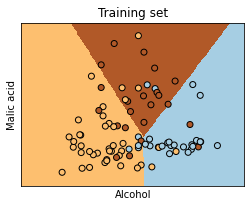

C:\Users\rayya\anaconda3\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


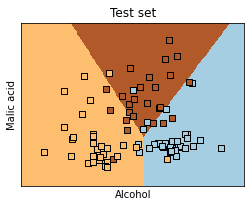

In [20]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X_red[:, 0].min() - .5, X_red[:, 0].max() + .5
y_min, y_max = X_red[:, 1].min() - .5, X_red[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_red_training[:, 0], X_red_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points 
plt.scatter(X_red_test[:, 0], X_red_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()